1. กำลังโหลดข้อสอบ (Unseen Data)...
2. กำลังโหลด 'The Oracle' มาทำนาย...
  ทำนายเสร็จสิ้น!

3. ผลการสอบ (Evaluation Metrics):
📉 MAE (ทายผิดเฉลี่ย): ±0.7640 °C
📉 RMSE (Error รวม): 1.2518

 สรุป: โดยเฉลี่ยโมเดลทายอุณหภูมิคลาดเคลื่อนไปแค่ 0.76 องศา
 🌟 (แม่นยำระดับเทพเจ้า! Error น้อยกว่า 1 องศา)

4. กำลังวาดกราฟเปรียบเทียบ...
บันทึกกราฟชื่อ 'evaluation_result.png' เรียบร้อย


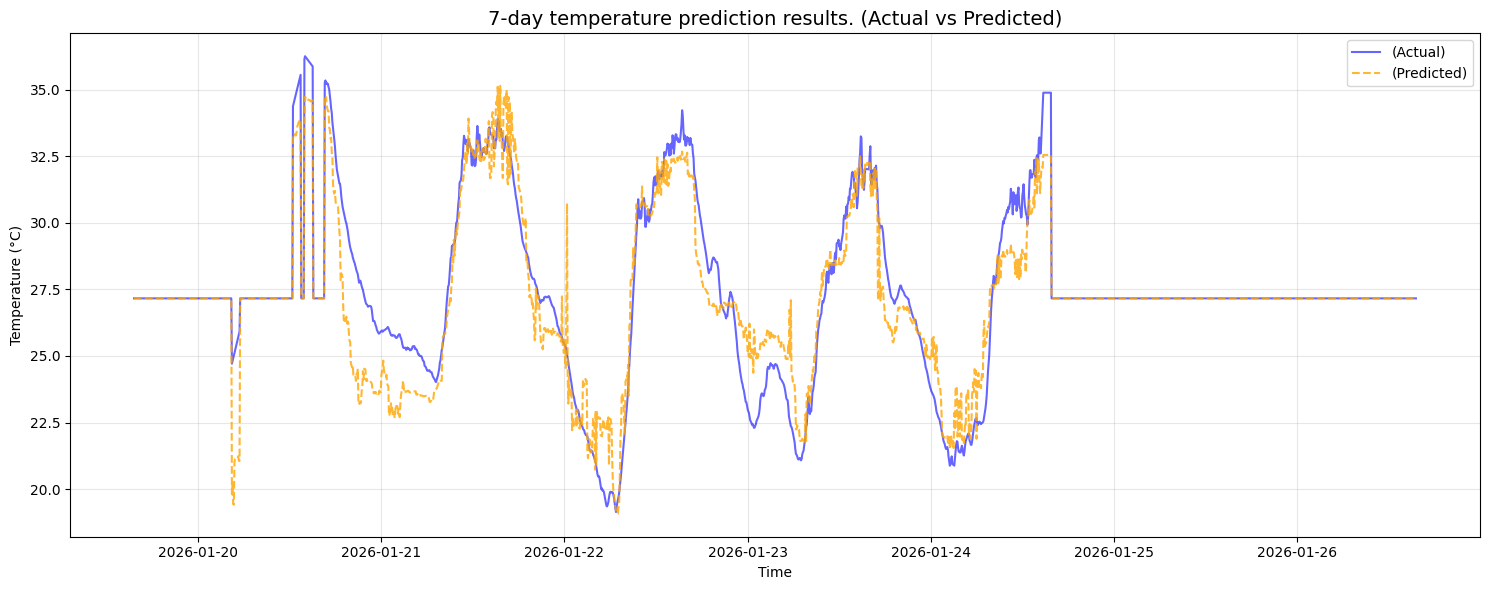

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error

# --- 1. เตรียมข้อมูลสอบ (Load Test Data) ---
print("1. กำลังโหลดข้อสอบ (Unseen Data)...")
test_df = pd.read_csv('zeus_test_unseen.csv')

# ระบุตัวแปร (ต้องเหมือนตอนเทรนเป๊ะๆ ห้ามสลับลำดับ!)
feature_cols = ['humidity', 'pressure', 'rain', 'uv', 'wind_speed', 'hour', 'is_day']
target_col = 'temp'

# ตรวจสอบว่าคอลัมน์ครบไหม
missing = [c for c in feature_cols if c not in test_df.columns]
if missing:
    raise ValueError(f"❌ ไฟล์ข้อสอบขาดคอลัมน์: {missing}")

X_test = test_df[feature_cols]
y_true = test_df[target_col] # เฉลยจริง

# --- 2. โหลดโมเดลและเริ่มทำนาย (Predict) ---
print("2. กำลังโหลด 'The Oracle' มาทำนาย...")
model = joblib.load('zeus_oracle_model.pkl') # โหลดสมอง AI

y_pred = model.predict(X_test) # <-- สั่งทำนายตรงนี้!
print("  ทำนายเสร็จสิ้น!")

# --- 3. ตรวจคะแนน (Calculate Metrics) ---
print("\n3. ผลการสอบ (Evaluation Metrics):")
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"📉 MAE (ทายผิดเฉลี่ย): ±{mae:.4f} °C")
print(f"📉 RMSE (Error รวม): {rmse:.4f}")

# แปลผลให้เข้าใจง่าย
print(f"\n สรุป: โดยเฉลี่ยโมเดลทายอุณหภูมิคลาดเคลื่อนไปแค่ {mae:.2f} องศา")
if mae < 1.0:
    print(" 🌟 (แม่นยำระดับเทพเจ้า! Error น้อยกว่า 1 องศา)")
elif mae < 2.0:
    print(" 👍 (แม่นยำดีมาก ใช้งานได้จริง)")
else:
    print(" ⚠️ (อาจต้องปรับปรุงโมเดลเพิ่ม)")

# --- 4. วาดกราฟโชว์อาจารย์ (Visualization) ---
print("\n4. กำลังวาดกราฟเปรียบเทียบ...")
plt.figure(figsize=(15, 6))

# สร้างแกนเวลาสำหรับกราฟ
# เนื่องจากเราแยก index มา อาจต้องสร้าง range ใหม่ หรือใช้ datetime ถ้ามี
if 'datetime' in test_df.columns:
    time_axis = pd.to_datetime(test_df['datetime'])
else:
    time_axis = range(len(y_true))

plt.plot(time_axis, y_true, label='(Actual)', color='blue', alpha=0.6)
plt.plot(time_axis, y_pred, label='(Predicted)', color='orange', linestyle='--', alpha=0.8)

plt.title('7-day temperature prediction results. (Actual vs Predicted)', fontsize=14)
plt.ylabel('Temperature (°C)')
plt.xlabel('Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# เซฟกราฟเก็บไว้ใส่รายงาน
plt.savefig('evaluation_result.png')
print("บันทึกกราฟชื่อ 'evaluation_result.png' เรียบร้อย")
plt.show()